In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skillbuilder-data-2009-2010/2012-2013-data-with-predictions-4-final.csv


### EDA

In [14]:
# Dropping null values since dataset is huge
df= pd.read_csv('/kaggle/input/skillbuilder-data-2009-2010/2012-2013-data-with-predictions-4-final.csv')

In [15]:
# Sample the dataset (e.g., 10% of the data)
# df = df.sample(frac=0.1, random_state=42)

# Save the sampled dataset to a new CSV file
# df.to_csv("sampled_dataset.csv", index=False)

In [16]:
df

,problem_log_id,skill,problem_id,user_id,assignment_id,assistment_id,start_time,end_time,problem_type,original,...,overlap_time,template_id,answer_id,answer_text,first_action,problemlogid,Average_confidence(FRUSTRATED),Average_confidence(CONFUSED),Average_confidence(CONCENTRATING),Average_confidence(BORED)
0,137792159,NaN,557460,61394,565736,341511,2012-09-28 15:11:27,2012-09-28 15:11:36.856,choose_1,1,...,9852,341511,NaN,she,0,137792159,0.361323,0.0,0.336529,0.000000
1,138083797,Rounding,365981,61394,573819,204043,2012-10-09 11:01:52,2012-10-09 11:02:13.182,algebra,1,...,21175,204043,NaN,74.29,0,138083797,0.361323,0.0,0.766925,0.000000
2,142332619,Multiplication and Division Integers,426415,61394,734130,247525,2013-03-07 10:53:20,2013-03-07 10:53:28.661,algebra,1,...,8645,247525,NaN,00,0,142332619,0.361323,0.0,0.766925,0.442968
3,145939397,Proportion,86686,61394,821352,48081,2013-08-20 19:54:56,2013-08-20 19:55:21.753,algebra,1,...,25728,46362,NaN,3.8,0,145939397,0.775000,0.0,0.766925,0.912281
4,137111284,NaN,399669,76592,557216,227869,2012-09-10 17:20:10,2012-09-10 17:24:56.579,choose_1,1,...,286578,227869,NaN,C (wr - 1)(wr + 1),0,137111284,0.361323,0.0,0.766925,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6123265,146114936,NaN,330756,227984,832474,180547,2013-08-30 10:10:55,2013-08-30 10:11:08.935,choose_1,1,...,13919,180547,NaN,yes,0,146114936,0.361323,0.0,0.766925,0.000000
6123266,146131268,NaN,765964,228009,831417,491711,2013-08-31 10:23:24,2013-08-31 10:23:27.757,choose_1,1,...,3748,491711,NaN,Biotic factors in a forest,0,146131268,0.361323,0.0,0.766925,0.000000
6123267,146118011,Addition and Subtraction Integers,84891,228039,832875,46603,2013-08-30 11:29:35,2013-08-30 11:30:05.517,algebra,1,...,30495,29881,NaN,-19,0,146118011,0.361323,0.0,0.211268,1.000000
6123268,146118739,NaN,543973,228055,832844,331778,2013-08-30 11:52:37,2013-08-30 11:52:41.251,choose_1,1,...,4244,331778,NaN,Yes,0,146118739,0.361323,0.0,0.336529,0.442968


In [17]:
print(df.isnull().sum())

problem_log_id                             0
skill                                3493190
problem_id                                 0
user_id                                    0
assignment_id                              0
assistment_id                              0
start_time                                 0
end_time                                   0
problem_type                               0
original                                   0
correct                                    0
bottom_hint                            60348
hint_count                                 0
actions                                    0
attempt_count                              0
ms_first_response                          0
tutor_mode                                 0
sequence_id                                0
student_class_id                           0
position                                   0
type                                       0
base_sequence_id                           0
skill_id  

### Structure of the dataset

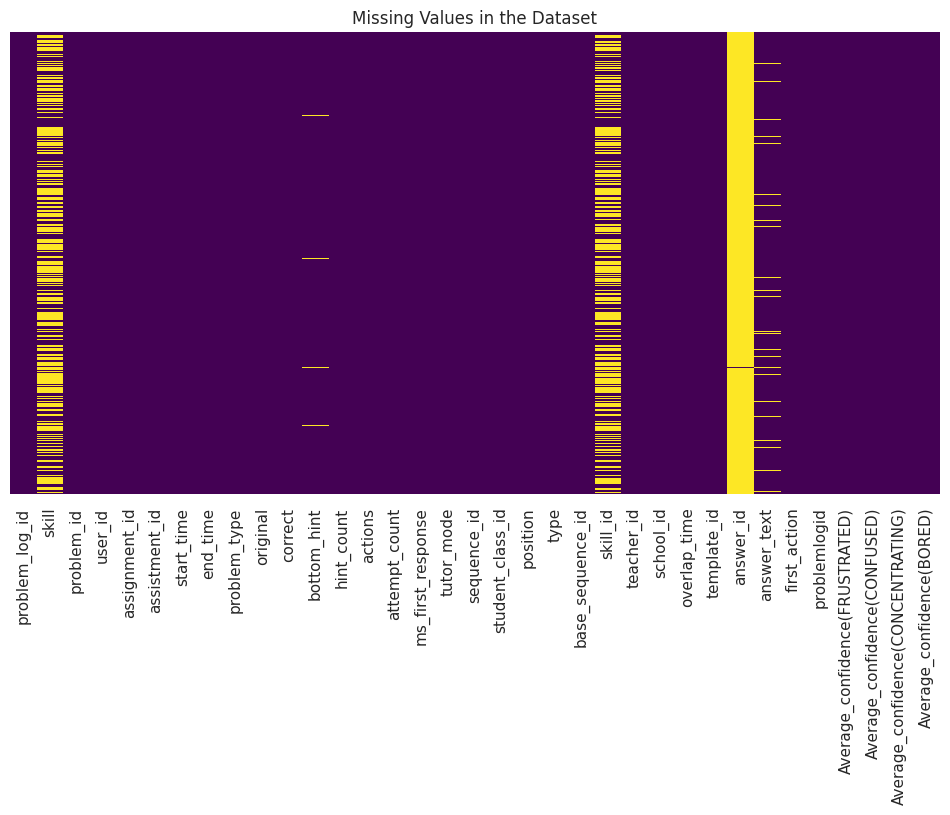

In [18]:
# Setting plot style

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in the Dataset")
plt.show()

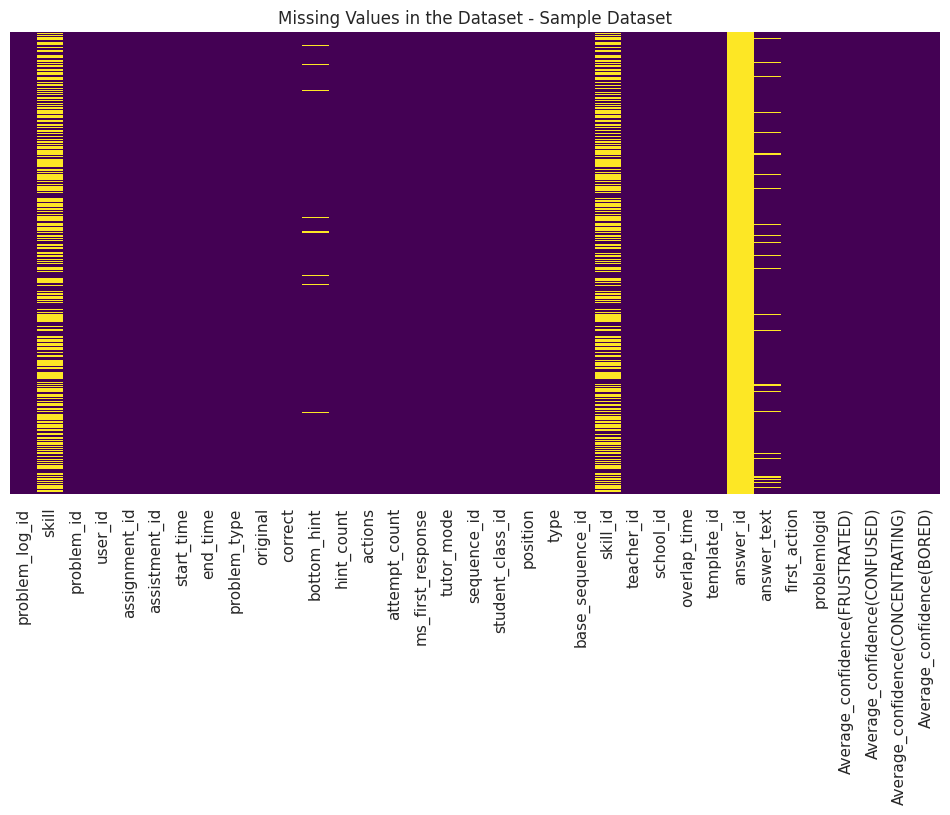

In [19]:
# Taking a sample Data set and verifying Heatmap of Missing values of Original dataset is similar to that of the sample dataset
sample_df = df.sample(n=60000, random_state=42)
plt.figure(figsize=(12,6))
sns.heatmap(sample_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in the Dataset - Sample Dataset")
plt.show()

### Pre-processing

In [20]:
# List of irrelevant columns
irrelevant_columns = [
    'problem_log_id', 'problem_id', 'user_id', 'teacher_id',
    'school_id', 'answer_id', 'answer_text', 'actions', 'tutor_mode', 'skill'
]

# Drop them from the dataset
data = df.drop(columns=irrelevant_columns)

In [21]:
print(data.isnull().sum())

assignment_id                              0
assistment_id                              0
start_time                                 0
end_time                                   0
problem_type                               0
original                                   0
correct                                    0
bottom_hint                            60348
hint_count                                 0
attempt_count                              0
ms_first_response                          0
sequence_id                                0
student_class_id                           0
position                                   0
type                                       0
base_sequence_id                           0
skill_id                             3411457
overlap_time                               0
template_id                                0
first_action                               0
problemlogid                               0
Average_confidence(FRUSTRATED)             0
Average_co

In [22]:
# data = data.dropna()

In [23]:
print(data.isnull().sum())

assignment_id                              0
assistment_id                              0
start_time                                 0
end_time                                   0
problem_type                               0
original                                   0
correct                                    0
bottom_hint                            60348
hint_count                                 0
attempt_count                              0
ms_first_response                          0
sequence_id                                0
student_class_id                           0
position                                   0
type                                       0
base_sequence_id                           0
skill_id                             3411457
overlap_time                               0
template_id                                0
first_action                               0
problemlogid                               0
Average_confidence(FRUSTRATED)             0
Average_co

In [24]:
data

,assignment_id,assistment_id,start_time,end_time,problem_type,original,correct,bottom_hint,hint_count,attempt_count,...,base_sequence_id,skill_id,overlap_time,template_id,first_action,problemlogid,Average_confidence(FRUSTRATED),Average_confidence(CONFUSED),Average_confidence(CONCENTRATING),Average_confidence(BORED)
0,565736,341511,2012-09-28 15:11:27,2012-09-28 15:11:36.856,choose_1,1,1.0,0.0,0,1,...,55482,NaN,9852,341511,0,137792159,0.361323,0.0,0.336529,0.000000
1,573819,204043,2012-10-09 11:01:52,2012-10-09 11:02:13.182,algebra,1,1.0,0.0,0,1,...,34221,54.0,21175,204043,0,138083797,0.361323,0.0,0.766925,0.000000
2,734130,247525,2013-03-07 10:53:20,2013-03-07 10:53:28.661,algebra,1,0.0,0.0,0,1,...,39601,279.0,8645,247525,0,142332619,0.361323,0.0,0.766925,0.442968
3,821352,48081,2013-08-20 19:54:56,2013-08-20 19:55:21.753,algebra,1,1.0,0.0,0,1,...,6912,79.0,25728,46362,0,145939397,0.775000,0.0,0.766925,0.912281
4,557216,227869,2012-09-10 17:20:10,2012-09-10 17:24:56.579,choose_1,1,1.0,0.0,0,1,...,37143,NaN,286578,227869,0,137111284,0.361323,0.0,0.766925,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6123265,832474,180547,2013-08-30 10:10:55,2013-08-30 10:11:08.935,choose_1,1,1.0,0.0,0,1,...,30538,NaN,13919,180547,0,146114936,0.361323,0.0,0.766925,0.000000
6123266,831417,491711,2013-08-31 10:23:24,2013-08-31 10:23:27.757,choose_1,1,0.0,0.0,0,1,...,208051,NaN,3748,491711,0,146131268,0.361323,0.0,0.766925,0.000000
6123267,832875,46603,2013-08-30 11:29:35,2013-08-30 11:30:05.517,algebra,1,0.0,0.0,0,1,...,208376,277.0,30495,29881,0,146118011,0.361323,0.0,0.211268,1.000000
6123268,832844,331778,2013-08-30 11:52:37,2013-08-30 11:52:41.251,choose_1,1,1.0,0.0,0,1,...,52536,NaN,4244,331778,0,146118739,0.361323,0.0,0.336529,0.442968


In [25]:
# Remove any additional non-numeric characters from datetime strings
data['start_time'] = data['start_time'].str.split('.').str[0]
data['end_time'] = data['end_time'].str.split('.').str[0]

# Then, convert to datetime
data['start_time'] = pd.to_datetime(data['start_time'], format="%Y-%m-%d %H:%M:%S")
data['end_time'] = pd.to_datetime(data['end_time'], format="%Y-%m-%d %H:%M:%S")

# Calculate 'time_taken' in seconds
data['time_taken'] = (data['end_time'] - data['start_time']).dt.total_seconds()

# Convert to float
data['time_taken'] = data['time_taken'].astype(float)

# Drop the original datetime columns
data = data.drop(columns=['start_time', 'end_time'])

# Check the result
print(data[['time_taken']].head())

from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = ['skill_id', 'problem_type', 'first_action', 'type']

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

print(data.dtypes)

   time_taken
0         9.0
1        21.0
2         8.0
3        25.0
4       286.0
assignment_id                          int64
assistment_id                          int64
problem_type                           int64
original                               int64
correct                              float64
bottom_hint                          float64
hint_count                             int64
attempt_count                          int64
ms_first_response                      int64
sequence_id                            int64
student_class_id                       int64
position                               int64
type                                   int64
base_sequence_id                       int64
skill_id                               int64
overlap_time                           int64
template_id                            int64
first_action                           int64
problemlogid                           int64
Average_confidence(FRUSTRATED)       float64
Average_confiden

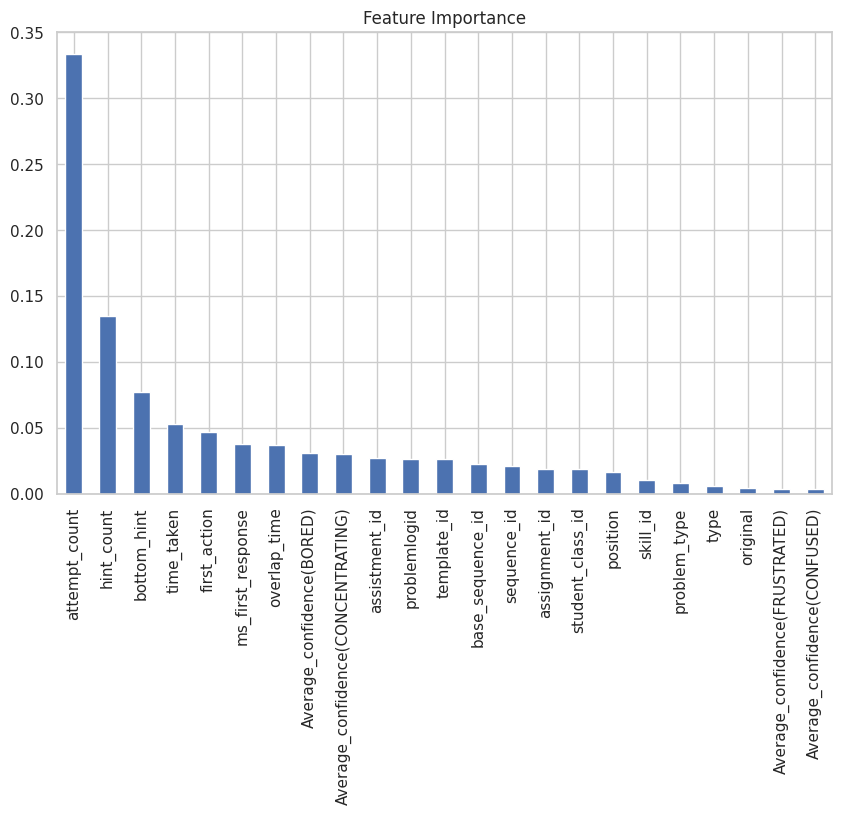

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your dataset is `data` and your target column is 'correct'
X = data.drop(columns=['correct'])  # Features
y = data['correct']  # Target
y = y.astype(int)

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
X_imputed = imputer.fit_transform(X)  # Impute missing values

# Convert imputed numpy array back to DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Stratified sampling to ensure equal class distribution
X_sampled, X_test, y_sampled, y_test = train_test_split(X_imputed, y, test_size=0.99, stratify=y, random_state=42)

# Train a Random Forest model to rank features
model = RandomForestClassifier(random_state=42)
model.fit(X_sampled, y_sampled)

# Plot feature importance
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title='Feature Importance')
plt.show()


In [29]:
y_pred = model.predict(X_test)

F1 Score: 0.94
Confusion Matrix:
[[1651590  310299]
 [  64154 4035995]]


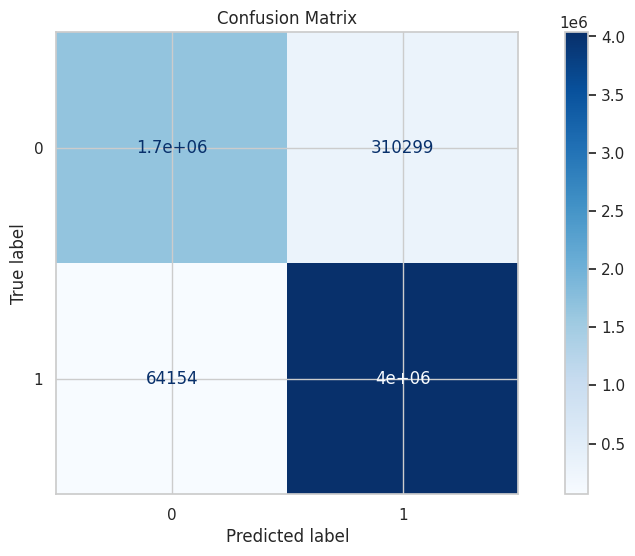

In [30]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
print(f"F1 Score: {f1:.2f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=set(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Model Training and hyper-parameter training

In [52]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming your dataset is `data` and your target column is 'correct'
X = data[['attempt_count', 'hint_count', 'bottom_hint', 'time_taken', 'first_action', 'ms_first_response', 'overlap_time',
          'Average_confidence(CONCENTRATING)', 'Average_confidence(BORED)']] # Features
y = data['correct']  # Target
y = y.astype(int)

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Stratified sampling to ensure equal class distribution
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.99, stratify=y, random_state=42)

# Impute missing values in both training and test sets
results = []
y_preds = dict()

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import warnings

# Define models and hyperparameter grids for grid search
models = {
    'Linear Regression': LinearRegression(),
    # 'Polynomial Regression': Pipeline([
    #     ('poly', PolynomialFeatures()),
    #     ('linear', LinearRegression())
    # ]),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

param_grids = {
    'Linear Regression': {},  # No hyperparameters for basic linear regression
    'Polynomial Regression': {
        'poly__degree': [2, 3, 4]  # Testing polynomial degrees
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10]
    }
}

# Placeholder for result
best_params = None

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    if param_grids[model_name]:  # If hyperparameters are defined
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring='f1_weighted', cv=3, n_jobs=-1, verbose = 3)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        best_model = model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    # print("y_pred before : ", y_pred.dtype)
    y_preds[model_name] = y_pred

    if y_pred.dtype != int:
      
      y_pred = (y_pred > 0.5).astype(int)
    # print("y_pred after : ", y_pred.dtype)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Model:{model_name}, Accuracy: {accuracy}, F1 Score: {f1}, Best Parameters: {best_params}")
    results.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1, 'Best Parameters': best_params})

# Convert results to a DataFrame for display
results_df = pd.DataFrame(results) 

# Display results
print(results_df.sort_values(by='F1 Score', ascending=False))


Training Linear Regression...
Model:Linear Regression, Accuracy: 0.8527792616474726, F1 Score: 0.8366162010006257, Best Parameters: None
Training K-Nearest Neighbors...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Model:K-Nearest Neighbors, Accuracy: 0.763293779319572, F1 Score: 0.7478061467148309, Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Training Support Vector Machine...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ....n_neighbors=3, weights=uniform;, score=0.719 total time=   1.1s
[CV 3/3] END ....n_neighbors=5, weights=uniform;, score=0.694 total time=   0.9s
[CV 1/3] END ...n_neighbors=7, weights=distance;, score=0.697 total time=   0.2s
[CV 2/3] END ...n_neighbors=7, weights=distance;, score=0.703 total time=   0.3s
[CV 3/3] END ...n_neighbors=7, weights=distance;, score=0.693 total time=   0.2s
[CV 1/3] END ....n_neighbors=9, weights=uniform;, score=0.664 total time=   1.0s
[CV 3/3] END ..............C=0.1, kernel=line

In [54]:
best_params

{'max_depth': 10, 'min_samples_split': 10}

### Recommendation System

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Load the dataset
# df = pd.read_csv("skill_builder_data.csv")  # Replace with the actual file path

# Step 1: Identify weak skills for each student
# Filter out problems that were answered incorrectly
incorrect_answers = df[df['correct'] == 0]

# Group by `user_id` and aggregate their weak `skill_id`
student_weak_skills = incorrect_answers.groupby('user_id')['skill_id'].apply(
    lambda x: ', '.join(map(str, x.dropna().unique()))
).reset_index()
student_weak_skills.rename(columns={'skill_id': 'weak_skills'}, inplace=True)

# Step 2: Prepare the resources (problems with skill associations)
resource_skills = df[['problem_id', 'skill_id']].drop_duplicates()
resource_skills['skill_id'] = resource_skills['skill_id'].astype(str)

# Step 3: Combine skills data for TF-IDF vectorization
combined_skills = pd.concat([
    student_weak_skills['weak_skills'],
    resource_skills['skill_id']
], axis=0).fillna('')

# Vectorize skill data using TF-IDF with limited dimensions
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
skills_tfidf = vectorizer.fit_transform(combined_skills)

# Step 4: Compute similarity using sparse operations
# Split back into student and resource vectors
student_skills_tfidf = skills_tfidf[:len(student_weak_skills)]
resource_skills_tfidf = skills_tfidf[len(student_weak_skills):]

# Function to compute similarity for a single student using sparse operations
def compute_similarity(student_vector, resource_vectors, top_n=5):
    similarities = cosine_similarity(student_vector, resource_vectors).flatten()
    top_indices = similarities.argsort()[-top_n:][::-1]
    return top_indices, similarities[top_indices]

# Step 5: Create a recommendation function
def recommend_resources(student_id, top_n=5):
    # Check if the student exists in the weak_skills data
    if student_id not in student_weak_skills['user_id'].values:
        print(f"Student ID {student_id} not found.")
        return pd.DataFrame()

    # Get the student's index in the TF-IDF matrix
    student_index = student_weak_skills[student_weak_skills['user_id'] == student_id].index[0]
    student_vector = student_skills_tfidf[student_index]

    # Compute similarity for this student only
    top_resource_indices, similarity_scores = compute_similarity(
        student_vector, resource_skills_tfidf, top_n=top_n
    )

    # Get the top recommended resources
    recommended_resources = resource_skills.iloc[top_resource_indices].copy()
    recommended_resources['similarity_score'] = similarity_scores

    return recommended_resources

# Step 6: Test the recommender system
student_id = 52535  # Replace with an actual `user_id` from the dataset
recommendations = recommend_resources(student_id, top_n=5)

# Display recommendations
if recommendations.empty:
    print(f"No recommendations found for student ID {student_id}.")
else:
    print(recommendations[['problem_id', 'skill_id', 'similarity_score']])


         problem_id skill_id  similarity_score
59311        505373    359.0           0.43002
301462       504707    393.0           0.43002
4439369      504730    393.0           0.43002
5600482      504674    359.0           0.43002
3697428      504751    393.0           0.43002


In [7]:
# Assuming a dictionary mapping skill_id to skill_name
skill_mapping = {359.0: "Algebra", 393.0: "Trignometry"}  # Ensure this dictionary includes all relevant skill IDs

# Ensure matching data types
recommendations['skill_id'] = recommendations['skill_id'].astype(float)

# Make a copy of the recommendations DataFrame to avoid SettingWithCopyWarning
recommendations = recommendations.copy()

# Ensure matching data types
recommendations.loc[:, 'skill_id'] = recommendations['skill_id'].astype(float)

# Map skill IDs and handle missing mappings
recommendations.loc[:, 'skill_name'] = recommendations['skill_id'].map(skill_mapping).fillna("Unknown Skill")

# Display recommendations with skill names
print(recommendations[['problem_id', 'skill_name']])

         problem_id   skill_name
59311        505373      Algebra
301462       504707  Trignometry
4439369      504730  Trignometry
5600482      504674      Algebra
3697428      504751  Trignometry
